<img src="images/representation.jpg" width="800">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-and-Functions" data-toc-modified-id="Imports-and-Functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports and Functions</a></span></li><li><span><a href="#Read-data" data-toc-modified-id="Read-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read data</a></span></li><li><span><a href="#Preprocess-data" data-toc-modified-id="Preprocess-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocess data</a></span></li><li><span><a href="#Transform-Data" data-toc-modified-id="Transform-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Transform Data</a></span><ul class="toc-item"><li><span><a href="#Count-vectorizer" data-toc-modified-id="Count-vectorizer-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Count vectorizer</a></span></li><li><span><a href="#TF-IDF-vectorizer" data-toc-modified-id="TF-IDF-vectorizer-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>TF-IDF vectorizer</a></span></li></ul></li><li><span><a href="#Classification-model" data-toc-modified-id="Classification-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Classification model</a></span></li><li><span><a href="#Evaluate" data-toc-modified-id="Evaluate-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Evaluate</a></span><ul class="toc-item"><li><span><a href="#The-most-important-features:-Positive-and-Negative" data-toc-modified-id="The-most-important-features:-Positive-and-Negative-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>The most important features: Positive and Negative</a></span></li><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Confusion Matrix</a></span></li><li><span><a href="#ROC-Curve" data-toc-modified-id="ROC-Curve-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>ROC Curve</a></span></li><li><span><a href="#Predict" data-toc-modified-id="Predict-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Predict</a></span></li></ul></li><li><span><a href="#Exercise:-Amazon-reviews" data-toc-modified-id="Exercise:-Amazon-reviews-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exercise: Amazon reviews</a></span><ul class="toc-item"><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Data-transformation" data-toc-modified-id="Data-transformation-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Data transformation</a></span><ul class="toc-item"><li><span><a href="#Count-Vectorizer" data-toc-modified-id="Count-Vectorizer-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Count Vectorizer</a></span><ul class="toc-item"><li><span><a href="#Classification-model" data-toc-modified-id="Classification-model-7.2.1.1"><span class="toc-item-num">7.2.1.1&nbsp;&nbsp;</span>Classification model</a></span></li><li><span><a href="#Evaluate" data-toc-modified-id="Evaluate-7.2.1.2"><span class="toc-item-num">7.2.1.2&nbsp;&nbsp;</span>Evaluate</a></span></li></ul></li><li><span><a href="#TF-IDF-Vectorizer" data-toc-modified-id="TF-IDF-Vectorizer-7.2.2"><span class="toc-item-num">7.2.2&nbsp;&nbsp;</span>TF-IDF Vectorizer</a></span><ul class="toc-item"><li><span><a href="#Classification-model" data-toc-modified-id="Classification-model-7.2.2.1"><span class="toc-item-num">7.2.2.1&nbsp;&nbsp;</span>Classification model</a></span></li><li><span><a href="#Evaluate" data-toc-modified-id="Evaluate-7.2.2.2"><span class="toc-item-num">7.2.2.2&nbsp;&nbsp;</span>Evaluate</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Imports and Functions

In [1]:
import warnings
warnings.filterwarnings("ignore")                     #Ignoring unnecessary warnings

import os
import re
import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk                                         #Natural language processing tool-kit

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer

from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF
from gensim.models import Word2Vec    

In [2]:
def confusionMatrix(y_test, y_pred):
    """ 
    Returns the confusion matrix plot and the confusion matrix dataframe.

    Parameters:
        y_test: dataframe with the real data labels.
        y_pred: dataframe with the predicted data labels.
    Returns:
        data_cm: Dataframe of the confusion matrix result.   

    """
    cm = confusion_matrix(y_test, y_pred)
    data_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
    data_cm.index.name = 'Actual'
    data_cm.columns.name = 'Predicted'

    sns.set(font_scale=1.4)
    fig, ax = plt.subplots(figsize=(12,6))

    sns.heatmap(data_cm, cmap="Blues", annot=True, fmt='', ax=ax)
    return data_cm

In [3]:
def roc_curve_plot(y_test, y_pred, legend):
    """ 
    Creates the ROC curve plot and returns the AUC score.

    Parameters:
        y_test: dataframe with the real data labels.
        y_pred: dataframe with the predicted data labels.
        legent: Name of the legend for the plot
    Returns:
        AUC_score: Score of the AUC, area under curve value.

    """
    fpr_lm, tpr_lm, _ = roc_curve(y_test, y_pred)
    AUC_score = roc_auc_score(y_test, y_pred)
    #print(AUC_score)
    plt.figure(figsize=(12,5))

    plt.plot([0, 1], [0, 1], 'k--', label='reference line')
    plt.plot(fpr_lm, tpr_lm, label=legend)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()
    return AUC_score

<img src="images/movie.jpg" width="800">

# Read data

In [5]:
reviews_train = pd.read_csv('data/movie_reviews_train_labeled.csv', index_col=0)
reviews_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 2 columns):
reviews    25000 non-null object
labels     25000 non-null int64
dtypes: int64(1), object(1)
memory usage: 585.9+ KB


In [6]:
## Positive reviews (label = 1)
reviews_train.loc[5].reviews

"This isn't the comedic Robin Williams, nor is it the quirky/insane Robin Williams of recent thriller fame. This is a hybrid of the classic drama without over-dramatization, mixed with Robin's new love of the thriller. But this isn't a thriller, per se. This is more a mystery/suspense vehicle through which Williams attempts to locate a sick boy and his keeper.<br /><br />Also starring Sandra Oh and Rory Culkin, this Suspense Drama plays pretty much like a news report, until William's character gets close to achieving his goal.<br /><br />I must say that I was highly entertained, though this movie fails to teach, guide, inspect, or amuse. It felt more like I was watching a guy (Williams), as he was actually performing the actions, from a third person perspective. In other words, it felt real, and I was able to subscribe to the premise of the story.<br /><br />All in all, it's worth a watch, though it's definitely not Friday/Saturday night fare.<br /><br />It rates a 7.7/10 from...<br />

In [7]:
## Negative reviews (label = 0)

reviews_train.loc[23030].reviews

"The problem with this movie is that it is shot on the worst possible camera and the film is blurry and grainy. Maybe it's just the fact that whoever was holding the camera couldn't hold still because they were having a seizure or something. There is also way too much poop and vomit in this movie. There is someone vomiting every twenty minutes and it makes me think that this was made by some bulimic or something. It was disgusting. Then there is the annoying high pitched screaming that goes on and on and on and doesn't stop until the credits roll. I also didn't like when all her friends were being shot (or not I don't know)and she goes in the van and puts band aids on. That was just really really stupid to even have that in a movie. How much gas can a person siphon to get a van going? It must be a whole lot because they don't run out of gas for the rest of the movie. It was a terrible movie and I would highly suggest not ever seeing it in your whole entire life."

# Preprocess data

In [8]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(reviews_train.loc[5].reviews)

for token in doc:
    resultlis = [(entity.text, entity.start_char, entity.end_char) for entity in doc.ents if entity.label_=="PERSON"]
print(resultlis)

[('Robin Williams', 23, 37), ('Robin Williams', 67, 81), ('Robin', 184, 189), ('Williams', 307, 315), ('Sandra Oh', 387, 396), ('William', 478, 485), ('Williams', 685, 693)]


In [9]:
import re
import string
from nltk.tokenize import word_tokenize
snow = nltk.stem.SnowballStemmer('english')
lemma = nltk.wordnet.WordNetLemmatizer()

#print(re.escape(string.punctuation))
stop_words = set(stopwords.words('english'))

def clean_text(text):
    '''Make text lowercase, 
       remove 
       remove punctuation,
       remove numbers and words containing numbers
       remove especial characters as \n
       strip the text
       lemmatize
       stemmize.'''
    text = text.lower()
    text = re.sub(re.compile('<.*?>'), '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\n', '', text)
    word_tokens = word_tokenize(text)
    text = [lemma.lemmatize(w.strip(), 'v') for w in word_tokens if not w in stop_words]
    text = [snow.stem(w.strip()) for w in text]

    return ' '.join(text)

In [10]:
data_clean = pd.DataFrame(reviews_train.reviews.apply(clean_text))

In [11]:
data_clean.loc[5].reviews

'comed robin william quirki insan robin william recent thriller fame hybrid classic drama without dramat mix robin new love thriller thriller per se mysteri suspens vehicl william attempt locat sick boy keeper also star sandra oh rori culkin suspens drama play pretti much like news report william charact get close achiev goal must say high entertain though movi fail teach guid inspect amus felt like watch guy william actual perform action third person perspect word felt real abl subscrib premis stori worth watch though definit friday saturday night fare rat fiend'

In [12]:
reviews_train.loc[5].reviews

"This isn't the comedic Robin Williams, nor is it the quirky/insane Robin Williams of recent thriller fame. This is a hybrid of the classic drama without over-dramatization, mixed with Robin's new love of the thriller. But this isn't a thriller, per se. This is more a mystery/suspense vehicle through which Williams attempts to locate a sick boy and his keeper.<br /><br />Also starring Sandra Oh and Rory Culkin, this Suspense Drama plays pretty much like a news report, until William's character gets close to achieving his goal.<br /><br />I must say that I was highly entertained, though this movie fails to teach, guide, inspect, or amuse. It felt more like I was watching a guy (Williams), as he was actually performing the actions, from a third person perspective. In other words, it felt real, and I was able to subscribe to the premise of the story.<br /><br />All in all, it's worth a watch, though it's definitely not Friday/Saturday night fare.<br /><br />It rates a 7.7/10 from...<br />

In [13]:
pd.set_option('max_colwidth',500)

reviews_train

,reviews,labels
0,"Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as ""Teachers"". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is ""Teachers"". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which...",1
1,"Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything from going to school, work, or vote for the matter. Most people think of the homeless as just a lost cause while worrying about things such as racism, the war on Iraq, pressuring kids to succeed, technology, the elections, inflation, or worrying if they'll be next to end up on the streets.<br /><br />But what if yo...",1
2,"Brilliant over-acting by Lesley Ann Warren. Best dramatic hobo lady I have ever seen, and love scenes in clothes warehouse are second to none. The corn on face is a classic, as good as anything in Blazing Saddles. The take on lawyers is also superb. After being accused of being a turncoat, selling out his boss, and being dishonest the lawyer of Pepto Bolt shrugs indifferently ""I'm a lawyer"" he says. Three funny words. Jeffrey Tambor, a favorite from the later Larry Sanders show, is fantastic...",1
3,"This is easily the most underrated film inn the Brooks cannon. Sure, its flawed. It does not give a realistic view of homelessness (unlike, say, how Citizen Kane gave a realistic view of lounge singers, or Titanic gave a realistic view of Italians YOU IDIOTS). Many of the jokes fall flat. But still, this film is very lovable in a way many comedies are not, and to pull that off in a story about some of the most traditionally reviled members of society is truly impressive. Its not The Fisher K...",1
4,"This is not the typical Mel Brooks film. It was much less slapstick than most of his movies and actually had a plot that was followable. Leslie Ann Warren made the movie, she is such a fantastic, under-rated actress. There were some moments that could have been fleshed out a bit more, and some scenes that could probably have been cut to make the room to do so, but all in all, this is worth the price to rent and see it. The acting was good overall, Brooks himself did a good job without his ch...",1
...,...,...
24995,"Towards the end of the movie, I felt it was too technical. I felt like I was in a classroom watching how our Navy performs rescues at sea. I liked seeing that the engines have fire extinguishers. I guess I should have figured that out before, but I never thought about it. Using a 747 to transport valuable old paintings with very little security is odd and not realistic. The acting was pretty good, since they're mostly seasoned professionals, but if you're going to stretch so far from what wo...",0
24996,"This is the kind of movie that my enemies content I watch all the time, but it's not bloody true. I only watch it once in a while to make sure that it's as bad as I first thought it was.<br /><br />Some kind of mobsters hijack a Boeing 747. (That, at least, is an improvement over having Boeing hijack a good part of the Pentagon.) The airplane goes down in the Bermuda triangle and sinks pressurized to the bottoms, a kind of post-facto submarine.<br /><br />It has one of those all-star casts, ...",0
24997,"I saw 'Descent' last night at the Stockholm Film Festival and it was one huge disappointment. Disappointment because the storyline was potentially powerful, the prospect of seeing Rosario Dawson in a smaller intimate movie was exciting and, being a fan (sounds pervy, I'm not!) of 'rape/revenge' flicks of the 70's, I was needless to say very curious to check this movie out. My conclusion: let's stick to the

# Transform Data

## Count vectorizer
It converts a collection of text documents to a matrix of token counts.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# max_features: the size of the vocabulary 
vectorizer = CountVectorizer(max_features=1000)
vectorizer.fit(data_clean.reviews)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=1000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [15]:
# The list of the vocabulary created with the count vectorizer.
vectorizer.vocabulary_
print(vectorizer.get_feature_names())

['abil', 'abl', 'absolut', 'accent', 'accept', 'achiev', 'across', 'act', 'action', 'actor', 'actress', 'actual', 'adapt', 'add', 'admit', 'adult', 'adventur', 'age', 'ago', 'agre', 'air', 'alien', 'allow', 'almost', 'alon', 'along', 'alreadi', 'also', 'although', 'alway', 'amaz', 'america', 'american', 'among', 'amount', 'amus', 'anim', 'ann', 'annoy', 'anoth', 'answer', 'anyon', 'anyth', 'anyway', 'apart', 'appar', 'appeal', 'appear', 'appreci', 'approach', 'around', 'art', 'artist', 'ask', 'aspect', 'atmospher', 'attack', 'attempt', 'attent', 'attract', 'audienc', 'averag', 'avoid', 'aw', 'award', 'away', 'babi', 'back', 'background', 'bad', 'band', 'bare', 'base', 'basic', 'battl', 'bear', 'beat', 'beauti', 'becom', 'begin', 'behind', 'believ', 'ben', 'best', 'better', 'beyond', 'big', 'biggest', 'bill', 'bite', 'bizarr', 'black', 'blood', 'blow', 'blue', 'bodi', 'book', 'bore', 'bother', 'box', 'boy', 'brain', 'break', 'brilliant', 'bring', 'british', 'brother', 'budget', 'build',

In [16]:
# We transform our data to the recently created count vectorizer vector format.
X = vectorizer.transform(data_clean.reviews)

This is how a text is represented as a vector.

In [17]:
print(X[0].toarray()[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 

In [18]:
# Example
data_clean.reviews.loc[0]

'bromwel high cartoon comedi run time program school life teacher year teach profess lead believ bromwel high satir much closer realiti teacher scrambl surviv financi insight student see right pathet teacher pomp petti whole situat remind school know student saw episod student repeat tri burn school immedi recal high classic line inspector sack one teacher student welcom bromwel high expect mani adult age think bromwel high far fetch piti'

In [19]:
df = pd.DataFrame({'Vocabulary':vectorizer.get_feature_names(), 'document':X[0].toarray()[0]})
df[df['document'] > 0].T

,15,17,81,110,121,149,161,287,308,327,...,749,762,795,848,866,889,896,913,969,994
Vocabulary,adult,age,believ,burn,cartoon,classic,comedi,episod,expect,far,...,school,see,situat,student,surviv,think,time,tri,whole,year
document,1,1,1,1,1,1,1,1,1,1,...,3,1,1,4,1,1,1,1,1,1


## TF-IDF vectorizer
It converts a collection of raw documents to a matrix of TF-IDF features.

In [20]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(data_clean.reviews)

In [21]:
print(X[0].toarray()[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.13305182 0.         0.11270037
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.08920548 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

 0.         0.         0.         0.        ]


In [22]:
# Example
data_clean.reviews.loc[0]

'bromwel high cartoon comedi run time program school life teacher year teach profess lead believ bromwel high satir much closer realiti teacher scrambl surviv financi insight student see right pathet teacher pomp petti whole situat remind school know student saw episod student repeat tri burn school immedi recal high classic line inspector sack one teacher student welcom bromwel high expect mani adult age think bromwel high far fetch piti'

In [23]:
df = pd.DataFrame({'Vocabulary':vectorizer.get_feature_names(), 'document':X[0].toarray()[0]})
df[df['document'] > 0].T

,15,17,81,110,121,149,161,287,308,327,...,749,762,795,848,866,889,896,913,969,994
Vocabulary,adult,age,believ,burn,cartoon,classic,comedi,episod,expect,far,...,school,see,situat,student,surviv,think,time,tri,whole,year
document,0.133052,0.1127,0.0892055,0.144861,0.146958,0.106643,0.0967376,0.114724,0.0973353,0.0965181,...,0.350006,0.0503358,0.123102,0.561576,0.14257,0.061953,0.0553721,0.0774635,0.0955108,0.0763173


# Classification model

In [24]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_clean.reviews, reviews_train.labels, test_size = 0.20)

In [25]:
# Create count vectorizer and vectorize the input text
#vectorizer = CountVectorizer(max_features=1000)
#X_train_vec = vectorizer.fit_transform(X_train)
#X_test_vec = vectorizer.transform(X_test)

# Create tfIDF vectorizer and vectorize the input text
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [26]:
# Train the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train_vec, y_train)

y_pred_lr = lr.predict(X_test_vec)
y_pred_lr_roc = lr.predict_proba(X_test_vec)[:, 1]

print(lr.score(X_train_vec, y_train))
print(accuracy_score(y_test, y_pred_lr))

0.88015
0.8612


In [27]:
len(lr.coef_[0])

1000

# Evaluate

## The most important features: Positive and Negative

In [28]:
feature_to_coef = {word: coef for word, coef in zip(vectorizer.get_feature_names(), lr.coef_[0])}

In [29]:
for best_positive in sorted(feature_to_coef.items(),key=lambda x: x[1], reverse=True)[:10]:
    print(best_positive)

('excel', 5.757684512368131)
('great', 5.582554114583104)
('perfect', 5.1486108721556025)
('favorit', 4.184809233046159)
('best', 4.0981727383388895)
('enjoy', 4.004746924707828)
('love', 3.735917895357678)
('beauti', 3.5598781073290233)
('amaz', 3.463243088444537)
('brilliant', 3.405580671812964)


In [30]:
for best_negative in sorted(feature_to_coef.items(), key=lambda x: x[1])[:10]:
    print (best_negative)

('worst', -8.321662730923927)
('wast', -7.185760880663031)
('aw', -6.511829143468453)
('poor', -5.770610859990874)
('bad', -5.759698076816511)
('bore', -5.209809810494893)
('dull', -4.554712252985147)
('wors', -4.544189213827537)
('disappoint', -4.450667381699738)
('fail', -4.178400993295008)


In [31]:
y_pred = lr.predict(X_test_vec)

## Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


data_cm = confusionMatrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2476
           1       0.85      0.88      0.86      2524

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



## ROC Curve

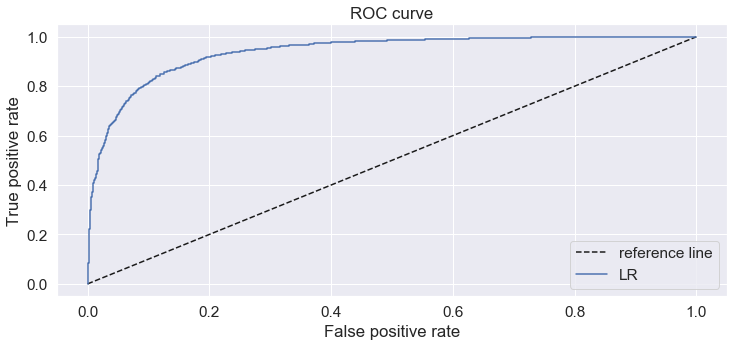

0.9380408498447217


In [33]:
AUC_score = roc_curve_plot(y_test, y_pred_lr_roc, legend = 'LR')
print(AUC_score)

## Predict

In [34]:
# Negative critic
critic = 'This film has been a waste of time, its the worst film Ive ever seen.\n'

# Positive critic
critic = 'This film has been the best film Ive ever seen. I will watch it unitl my eyes start bleeding.\n'

# Ambiguous critic
critic = 'I like the film almost till the end, but it was not as good as the first one.\n'

print(critic)

# Preprocess
critic = clean_text(critic)

# Transform the text to vectors
vec = vectorizer.transform([critic])

# Predict the sentiment
if lr.predict(vec) == 0:
    print('Negative review')
else:
    print('Positive review')

I like the film almost till the end, but it was not as good as the first one.

Positive review


<img src="images/amazon.jpg" width="800">

# Exercise: Amazon reviews

In [35]:
data = pd.read_csv('data/amazon_reviews_course.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8718 entries, 0 to 8717
Data columns (total 2 columns):
Text     8718 non-null object
Score    8718 non-null object
dtypes: object(2)
memory usage: 136.3+ KB


In [36]:
data_X = data.Text
data_y = data.Score

In [37]:
data.Score.value_counts()

positive    7285
negative    1433
Name: Score, dtype: int64

## Data Cleaning

In [38]:
amazon_clean = pd.DataFrame(data.Text.apply(clean_text))

In [39]:
# Cleaned text
amazon_clean.loc[1].Text

'product arriv label jumbo salt peanut peanut actual small size unsalt sure error vendor intend repres product jumbo'

In [40]:
# Raw text
print(data.loc[1].Text)
data.loc[1].Score

Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".


'negative'

##  Data transformation
### Count Vectorizer

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)
vectorizer.fit(amazon_clean.Text)
X_count_vec = vectorizer.transform(amazon_clean.Text)

#### Classification model

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_count_vec, data_y, test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_lr_roc = lr.predict_proba(X_test)[:, 1]

print('Accuracy train',lr.score(X_train, y_train))
print('Accuracy test',accuracy_score(y_test, y_pred_lr))

Accuracy train 0.9479495268138801
Accuracy test 0.8853211009174312


In [44]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_test)
y_test_numerical = le.transform(y_test)

In [45]:
y_test_maped = y_test.map({'positive':1, 'negative':0})

In [46]:
#y_test_maped

#### Evaluate

##### The most important features: Positive and Negative

In [47]:
feature_to_coef = {word: coef for word, coef in zip(vectorizer.get_feature_names(), lr.coef_[0])}

In [48]:
for best_positive in sorted(feature_to_coef.items(),key=lambda x: x[1], reverse=True)[:10]:
    print(best_positive)

('worri', 1.9811832934947426)
('perfect', 1.823145988927912)
('amaz', 1.7453364788588812)
('delici', 1.7244832414561928)
('refresh', 1.5944519143351061)
('hook', 1.5806576985357133)
('bulk', 1.542943980952437)
('excel', 1.5116762310273064)
('thank', 1.482143329600112)
('best', 1.4780542220692847)


In [49]:
for best_negative in sorted(feature_to_coef.items(), key=lambda x: x[1])[:10]:
    print (best_negative)

('disappoint', -2.258845958738157)
('worst', -2.105143601856137)
('terribl', -2.0698740347513622)
('return', -1.8710868564539016)
('weak', -1.850817173745215)
('horribl', -1.8405862184085164)
('idea', -1.8229288418306249)
('wors', -1.7148440523137691)
('throw', -1.6526433571570245)
('aw', -1.6124819981684844)


In [50]:
y_pred = lr.predict(X_test)

##### Confusion Matrix

              precision    recall  f1-score   support

    negative       0.69      0.55      0.61       288
    positive       0.91      0.95      0.93      1456

    accuracy                           0.89      1744
   macro avg       0.80      0.75      0.77      1744
weighted avg       0.88      0.89      0.88      1744



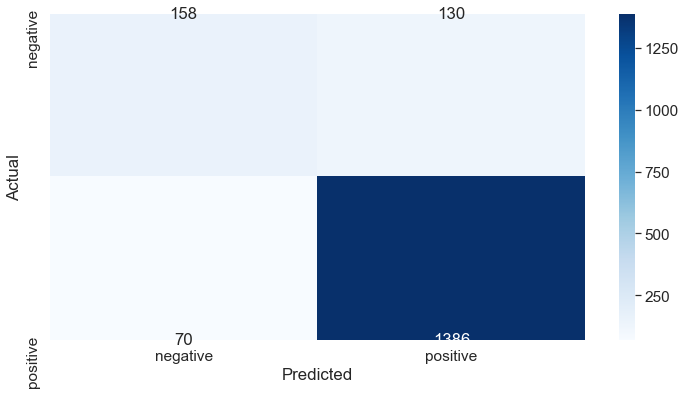

In [51]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


data_cm = confusionMatrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

##### ROC curve

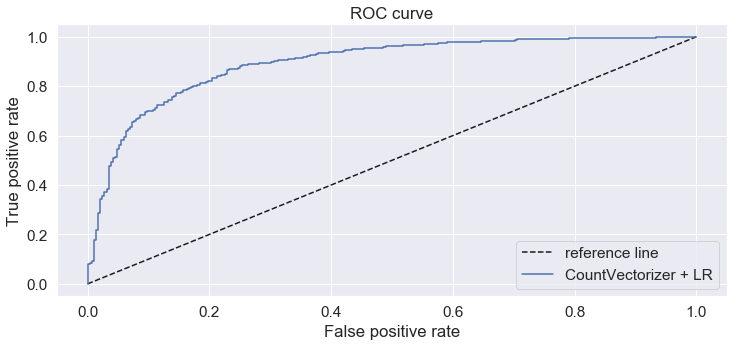

0.8917839972527473


In [52]:
AUC_score = roc_curve_plot(y_test_maped, y_pred_lr_roc, legend = 'CountVectorizer + LR')
print(AUC_score)

### TF-IDF Vectorizer

In [53]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf_vec = tfidf_vectorizer.fit_transform(amazon_clean.Text)

#### Classification model

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_vec, data_y, test_size=0.2, random_state=42)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_lr_roc = lr.predict_proba(X_test)[:, 1]

print('Accuracy train', lr.score(X_train, y_train))
print('Accuracy test', accuracy_score(y_test, y_pred_lr))

Accuracy train 0.9036420992256955
Accuracy test 0.8904816513761468


In [56]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_test)
y_test_numerical = le.transform(y_test)

In [57]:
y_test_maped = y_test.map({'positive':1, 'negative':0})

In [58]:
#y_test_maped

#### Evaluate

##### The most important features: Positive and Negative

In [59]:
feature_to_coef = {word: coef for word, coef in zip(tfidf_vectorizer.get_feature_names(), lr.coef_[0])}

In [60]:
for best_positive in sorted(feature_to_coef.items(),key=lambda x: x[1], reverse=True)[:10]:
    print(best_positive)

('great', 5.343907728434251)
('love', 4.234514503602817)
('best', 3.7363946534827086)
('delici', 3.3281873090907896)
('good', 3.1284747551692287)
('perfect', 2.9913194772156664)
('excel', 2.64237238612436)
('favorit', 2.5634174120540036)
('nice', 2.533477539627875)
('snack', 2.4349253518252683)


In [61]:
for best_negative in sorted(feature_to_coef.items(), key=lambda x: x[1])[:10]:
    print (best_negative)

('disappoint', -5.323700947788548)
('return', -3.5992441085369244)
('wast', -3.187802364490541)
('weak', -3.089214433755223)
('throw', -2.9514323557023627)
('terribl', -2.9417887173336164)
('bad', -2.8982496486981453)
('horribl', -2.8710825287827886)
('worst', -2.6850358069623876)
('think', -2.6395038603112293)


In [62]:
y_pred = lr.predict(X_test)

##### Confusion Matrix

              precision    recall  f1-score   support

    negative       0.88      0.39      0.54       288
    positive       0.89      0.99      0.94      1456

    accuracy                           0.89      1744
   macro avg       0.88      0.69      0.74      1744
weighted avg       0.89      0.89      0.87      1744



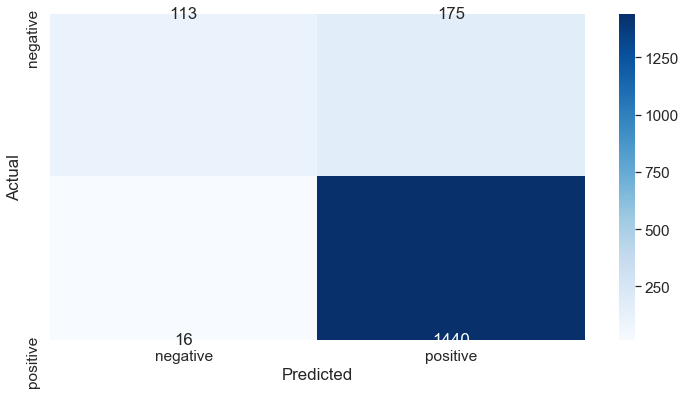

In [63]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


data_cm = confusionMatrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

##### ROC Curve

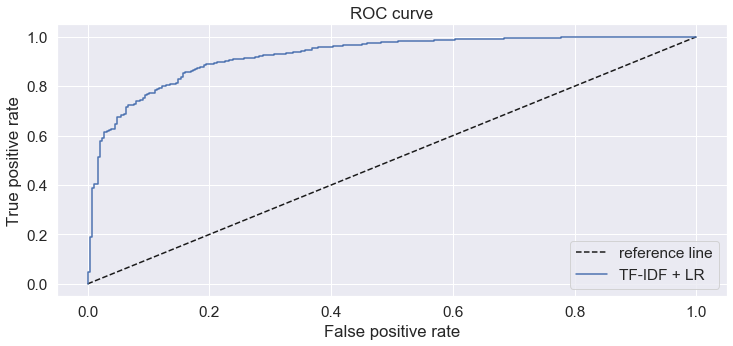

0.9232295482295482


In [64]:
AUC_score = roc_curve_plot(y_test_maped, y_pred_lr_roc, legend = 'TF-IDF + LR')
print(AUC_score)